In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [2]:
df = pd.read_csv("airline_passengers.csv",index_col='Month',parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Transformations

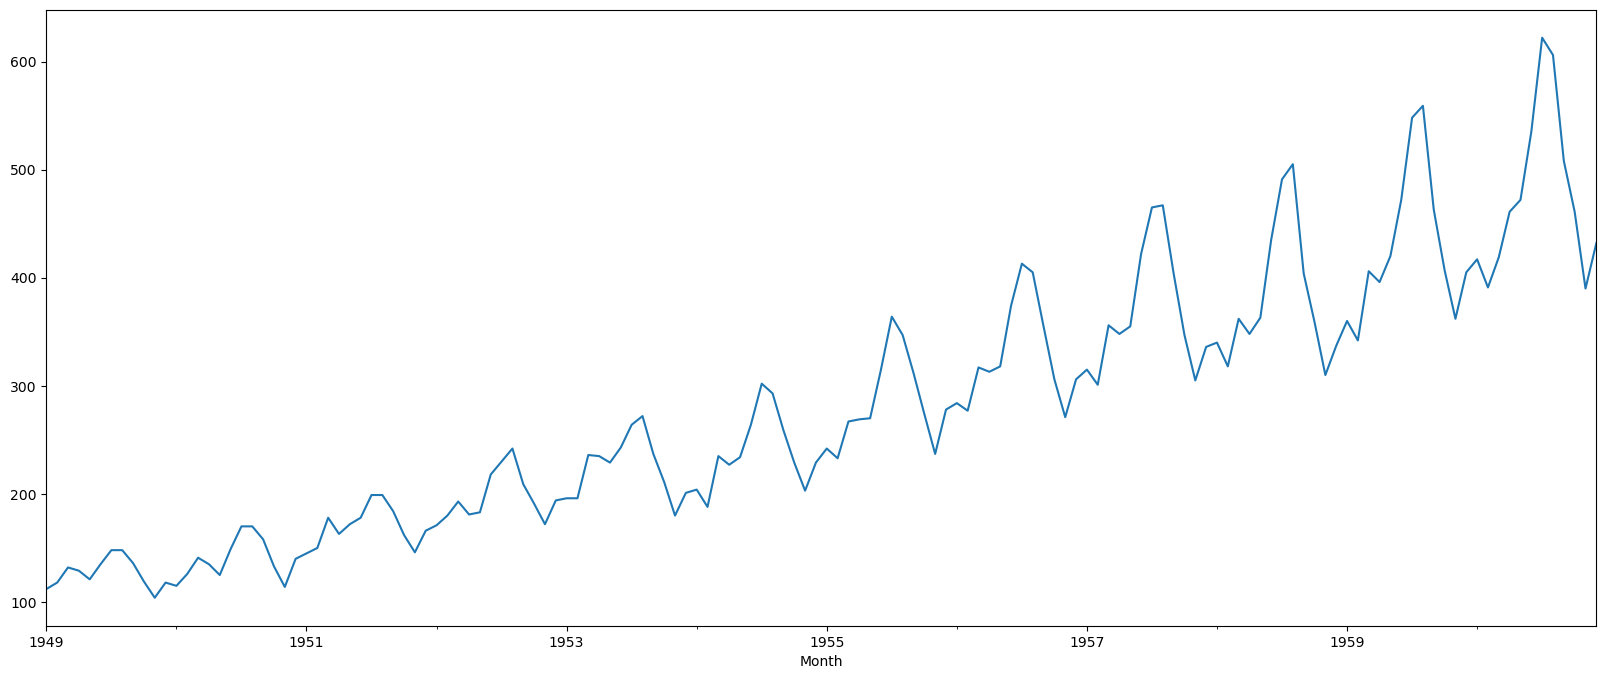

In [3]:
df['Passengers'].plot(figsize=(20,8));

In [4]:
df['SqrtPassengers'] = np.sqrt(df['Passengers'])

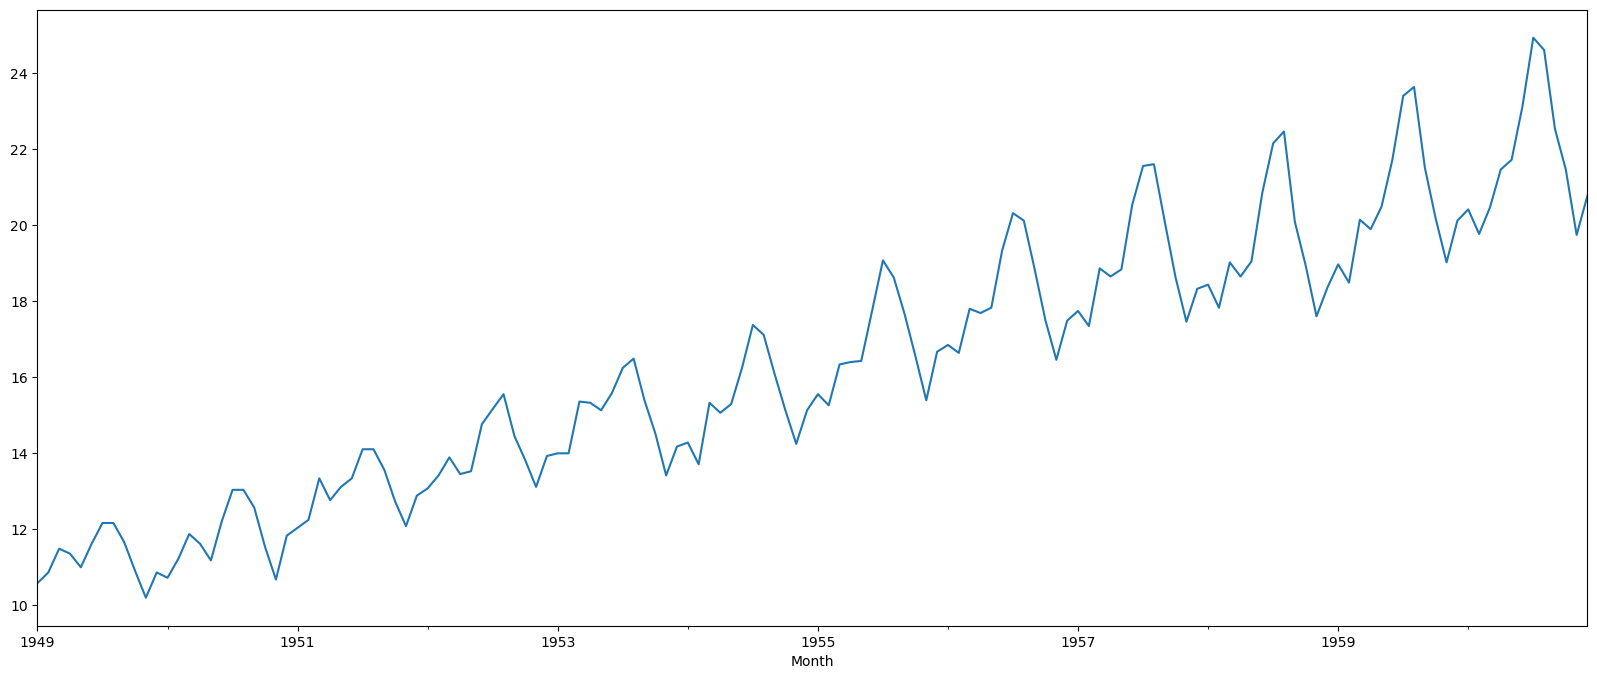

In [5]:
df['SqrtPassengers'].plot(figsize=(20,8));

In [6]:
df['LogPassengers'] = np.log(df['Passengers'])

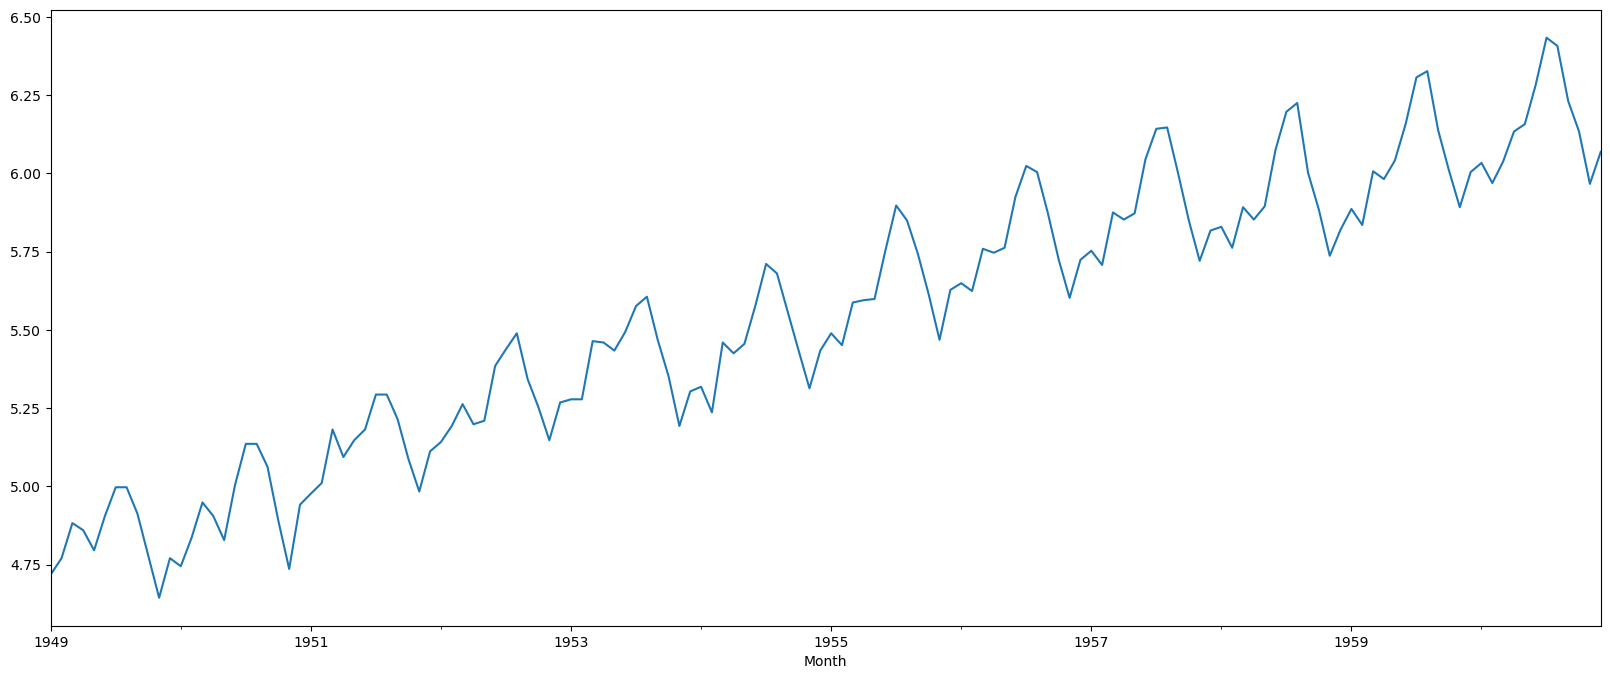

In [7]:
df['LogPassengers'].plot(figsize=(20,8));

In [8]:
data,lam = boxcox(df['Passengers'])

In [9]:
lam

0.14802265137037945

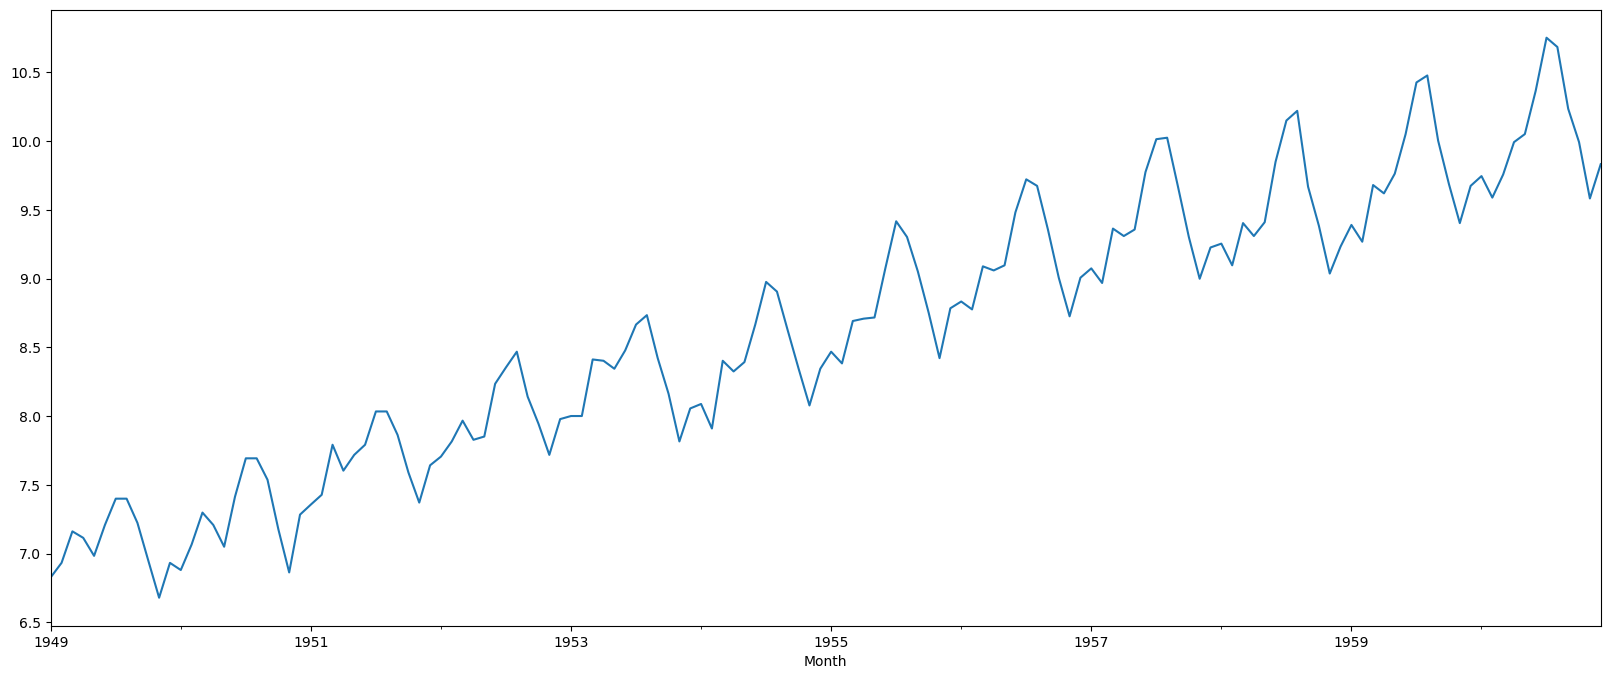

In [10]:
df['BoxCoxPassengers']= data
df['BoxCoxPassengers'].plot(figsize=(20,8));

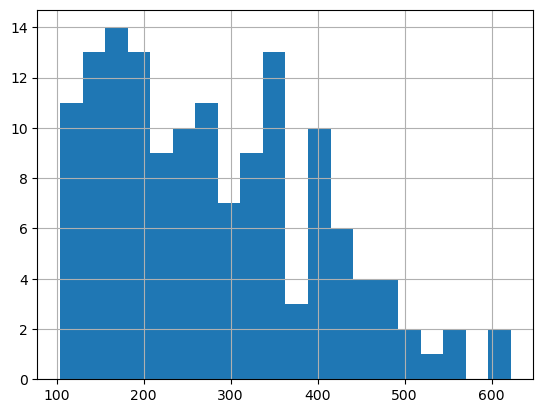

In [11]:
df['Passengers'].hist(bins=20);

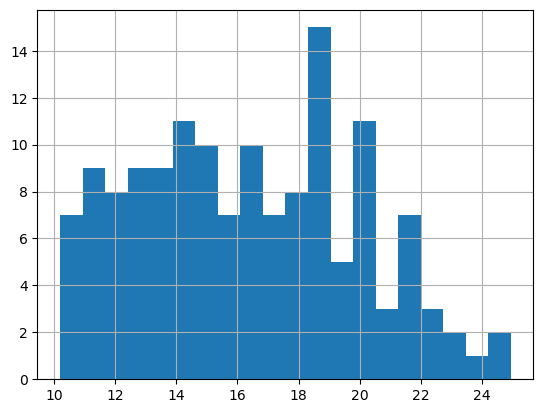

In [12]:
df['SqrtPassengers'].hist(bins=20);

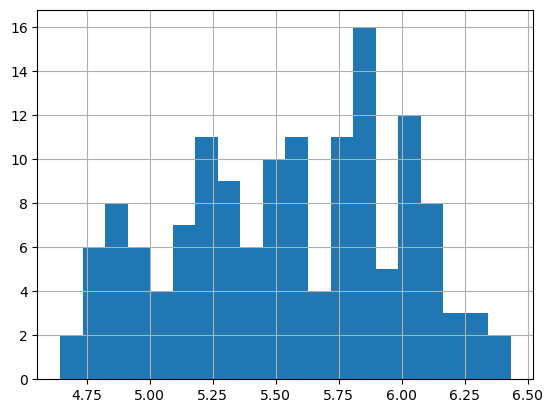

In [13]:
df['LogPassengers'].hist(bins=20);

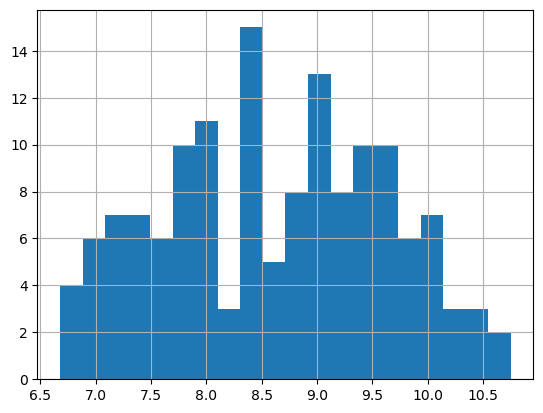

In [14]:
df['BoxCoxPassengers'].hist(bins=20);

## Price Simulations in Code

In [15]:
# number of time steps
T = 1000

# initial Price
P0 = 10

# drift
mu = 0.001

In [16]:
# last log price
last_p = np.log(P0)

log_returns =np.zeros(T)
prices = np.zeros(T)
for t  in range(T):
    # sample a log return
    r = 0.01 * np.random.randn()
    
    # Compute the new log price
    p = last_p+mu+r
    
    # Store the return and price
    log_returns[t] = r + mu
    prices[t] = np.exp(p)
    
    #assign last p
    last_p = p

Explanation:

T: This is the number of time steps or periods over which you want to simulate stock prices. In this case, you've chosen 1000 periods.

P0: This is the initial stock price at the beginning of the simulation. It's set to 10 units.

mu: This is the drift term. In the context of stock price simulations, the drift represents the expected return of the stock. It's set to 0.001, which is 0.1% (or a daily return of 0.1%).

last_p: This is the logarithm of the initial price. Taking the logarithm helps in the arithmetic of continuous compounding.

log_returns: An array of size T initialized with zeros. It will store the logarithmic returns for each time step.

prices: Another array of size T initialized with zeros. It will store the stock prices for each time step.

This loop runs for T time steps.

In each iteration:

r = 0.01 * np.random.randn(): A random log return is generated. The function np.random.randn() generates a sample from a standard normal distribution (mean = 0, standard deviation = 1). Multiplying it by 0.01 scales the return.

p = last_p+mu+r: The new log price is computed by adding the drift (mu) and the random return (r) to the last log price.
log_returns[t] = r + mu: The log return for the current time step is stored.

prices[t] = np.exp(p): The actual stock price for the current time step is computed by taking the exponential of the log price and stored.

last_p = p: The current log price becomes the 'last log price' for the next iteration.

In summary, this code simulates the path of a stock price over T periods using a simple geometric Brownian motion model. The price evolution is influenced by a constant drift (representing the expected return) and a random shock in each period (representing the unexpected volatility). The logarithm of the price is used for simplicity, and the actual price is derived from the log price using the exponential function.

In [17]:
### Optional---- Vectorizing the above loop--------
# Generate all random returns at once
#random_returns = 0.01 * np.random.randn(T)

# Compute log returns
#log_returns = mu + random_returns

# Compute the cumulative sum of log returns, starting from the last log price
#log_prices = last_p + np.cumsum(log_returns)

# Compute actual prices
#prices = np.exp(log_prices)


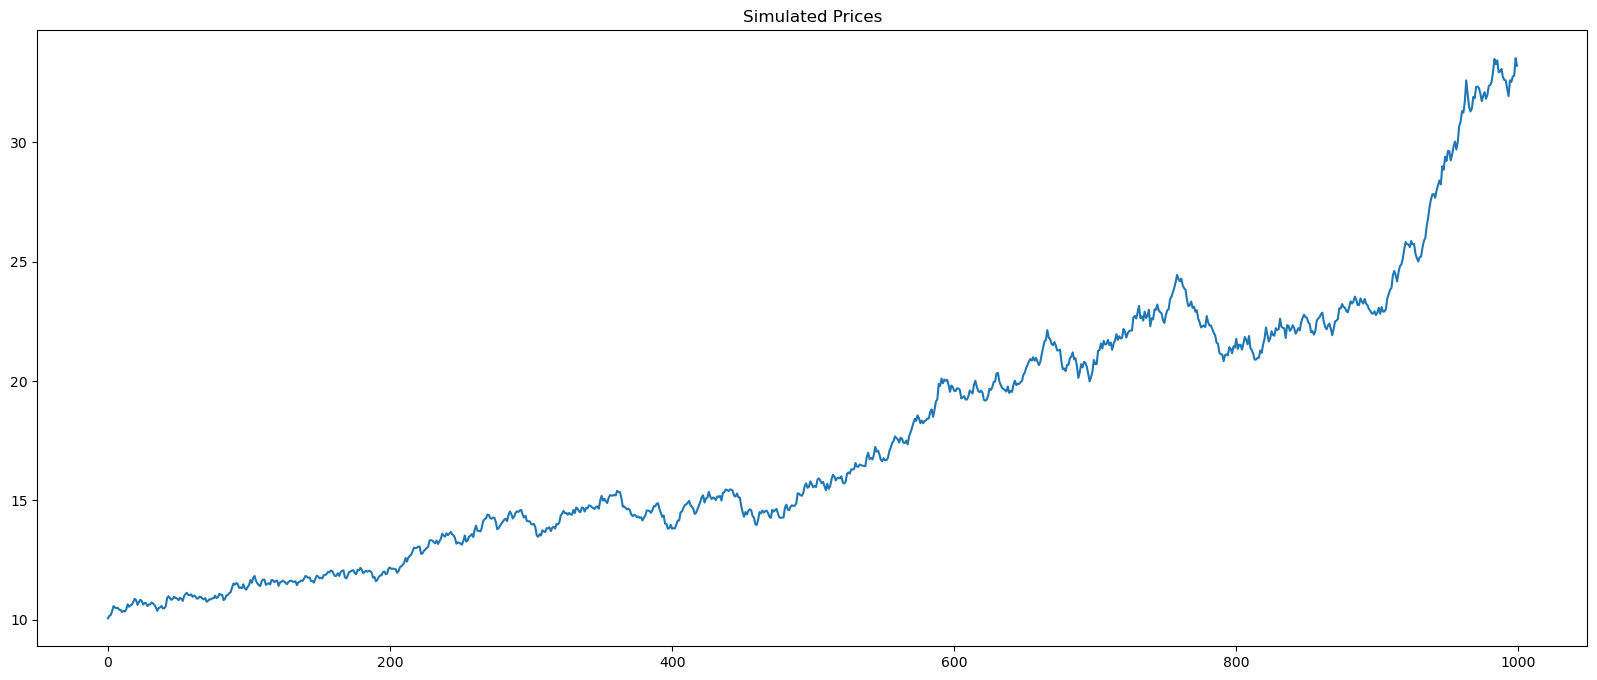

In [18]:
plt.figure(figsize=(20,8))
plt.plot(prices)
plt.title("Simulated Prices");

## Metrics and Naive Forecast in Code

In [19]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score,mean_squared_error

In [20]:
df = pd.read_csv('SPY.csv',index_col='Date',parse_dates=True)

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [22]:
df['ClosePrediction'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [23]:
y_true =df.iloc[1:]['Close']
y_pred =df.iloc[1:]['ClosePrediction']

### Metrics

Main Idea: Get a feel of how the values relate to one another.What's Good, what's bad, If the R-sq is good will the MAE be also be good

In [24]:
#SSE
(y_true - y_pred).dot(y_true-y_pred)

6330.374289492605

In [27]:
#MSE
mean_squared_error(y_true,y_pred)

2.798573956451196

In [28]:
# MSE again
# Don't be afraid to implement things yourself
(y_true - y_pred).dot(y_true-y_pred)/len(y_true)

2.798573956451196

In [29]:
# RMSE
mean_squared_error(y_true,y_pred,squared=False)

1.672893886787562

In [30]:
# RMSE Again
np.sqrt((y_true - y_pred).dot(y_true-y_pred)/len(y_true))

1.672893886787562

In [31]:
# MAE
mean_absolute_error(y_true,y_pred)

1.1457559803120336

In [32]:
# R-sq
# Wow, what a great prediction
# why it is so good, be suspicious
r2_score(y_true,y_pred)

0.9989603259063914

In [33]:
# MAPE
mean_absolute_percentage_error(y_true,y_pred)

0.006494073151422373

In [34]:
#sMAPE
# Not Implemented, oh well...
# Good thing  we are brave and know how to implement them
def smape(y_true,y_pred):
    numerator = np.abs(y_true,y_pred)
    denominator = (np.abs(y_true)+ np.abs(y_pred))/2
    ratio = numerator/denominator
    return ratio.mean()

smape(y_true,y_pred)

C:\Users\asus\AppData\Local\Temp\ipykernel_11908\883323202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerator = np.abs(y_true,y_pred)


1.0

## SMA in Code

In [35]:
close = pd.read_csv("sp500_close.csv",index_col=0,parse_dates=True)
close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [36]:
goog = close[['GOOG']].copy().dropna()

close[['GOOG']]: This extracts the 'GOOG' column from the close DataFrame as a new DataFrame. The double square brackets ensure that the result is a DataFrame and not a Series. 'GOOG' likely refers to the closing prices of Google's stock.

.copy(): This creates a deep copy of the DataFrame. Without this, goog might be a view on the original data, which means that changes made to goog could potentially affect the original close DataFrame. By using .copy(), you ensure that goog is a completely separate object, and modifications to it won't impact the original data.

.dropna(): This removes any rows with missing (NaN) values from the DataFrame. In the context of stock prices, a NaN value might indicate a day when data was not available.

In summary, the code creates a new DataFrame called goog that contains the 'GOOG' column from the close DataFrame, but without any missing values.







In [37]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


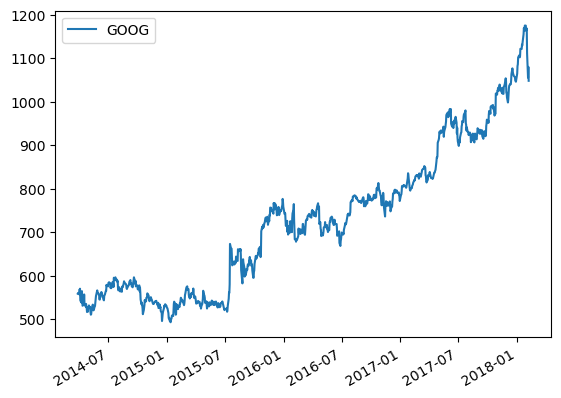

In [39]:
goog.plot();

In [40]:
goog_ret = np.log(goog.pct_change(1)+1)

goog.pct_change(1): This method calculates the percentage change between the current and a prior element in the goog DataFrame. The parameter 1 indicates that we are looking at the change from the previous row (i.e., a one-period lag). The result of this operation is a new DataFrame (or Series) with the same shape as goog, where each value represents the percentage change from the previous row.

For example, if the values in goog for two consecutive days are 100 and 105, then the percentage change for the second day would be  =0.05 or 5%.

+ 1: This is added to each element of the percentage change DataFrame. The reason is to adjust the values such that when taking the logarithm in the next step, you avoid taking the logarithm of zero (or negative values). Adding 1 effectively shifts the domain of values to be positive. For the example above, 
0.05 =1 =1.05
1.05
0.05+1=1.05.

np.log(...): This applies the natural logarithm (base e) to each element in the DataFrame. Using the logarithm on returns is a common practice in finance, as it can make certain statistical properties more tractable. These are often referred to as "log returns."

In summary, the code computes the daily log returns of the goog DataFrame. Log returns are used for various purposes in finance, such as in time series analysis, portfolio optimization, and risk management.

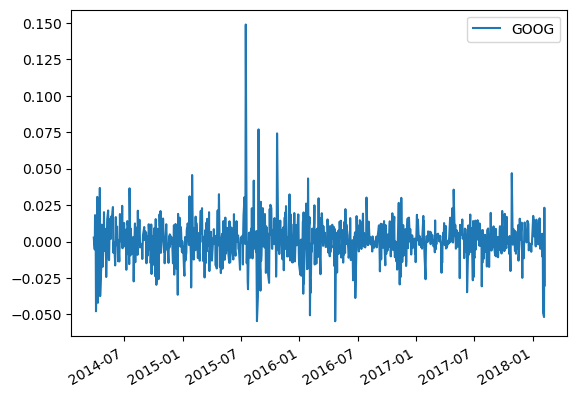

In [42]:
goog_ret.plot();

In [44]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [45]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

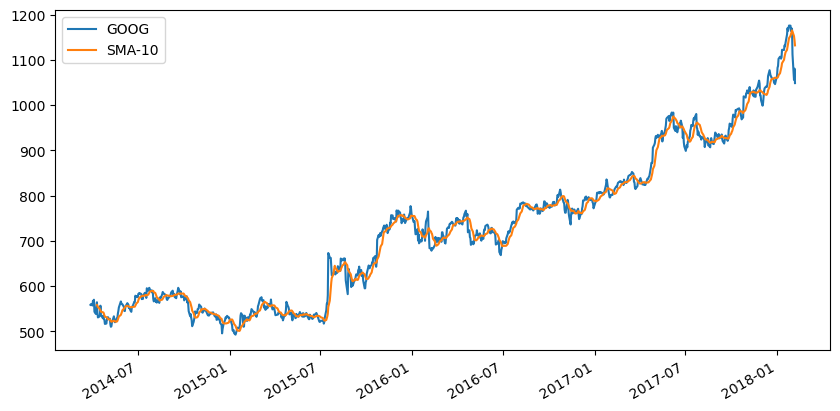

In [47]:
goog.plot(figsize=(10,5));

<Axes: >

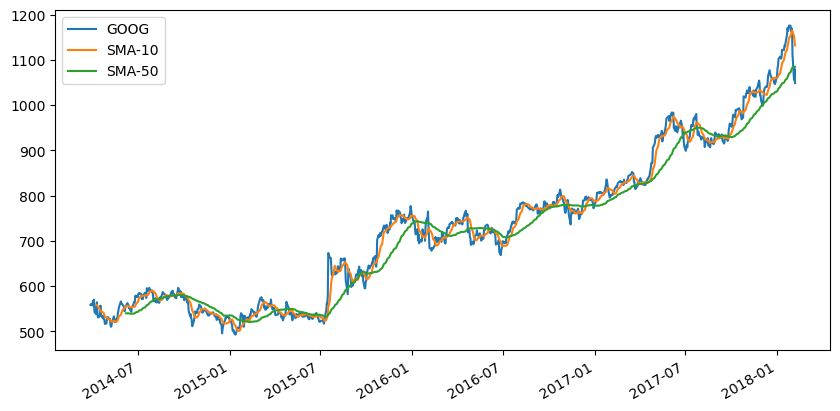

In [48]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10,5))

In [49]:
goog_aapl = close[['GOOG','AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [50]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [51]:
goog_aapl_ret = np.log(1+goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [52]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

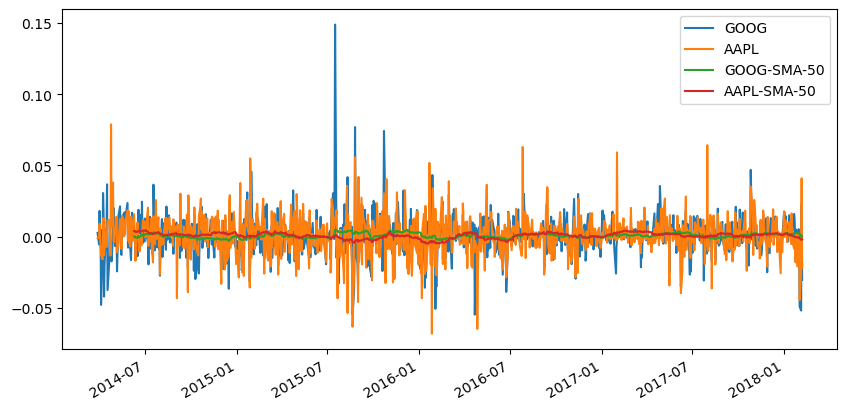

In [54]:
goog_aapl_ret.plot(figsize=(10,5));

In [59]:
cov = goog_aapl_ret[['GOOG','AAPL']].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [60]:
corr = goog_aapl_ret[['GOOG','AAPL']].rolling(50).corr()
corr.tail(16)

GOOG      AAPL
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000

## EWMA and Holt-Winters Code

In [61]:
df = pd.read_csv("airline_passengers.csv",index_col='Month',parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [62]:
df.isna().sum()

Passengers    0
dtype: int64

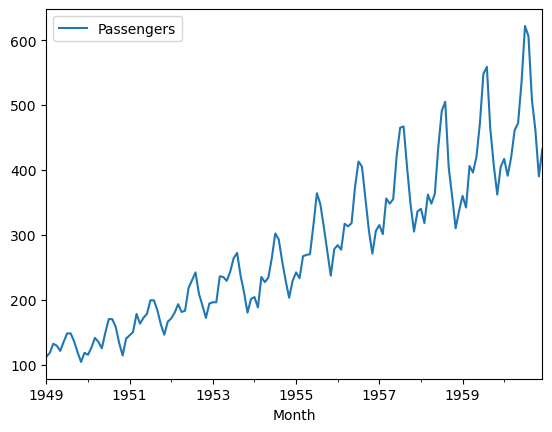

In [64]:
df.plot();

In [65]:
alpha = 0.2

In [66]:
df['EWMA'] = df['Passengers'].ewm(alpha=alpha,adjust=False).mean()
# False means it is using WEMA method

In [67]:
type(df['Passengers'].ewm(alpha=alpha,adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

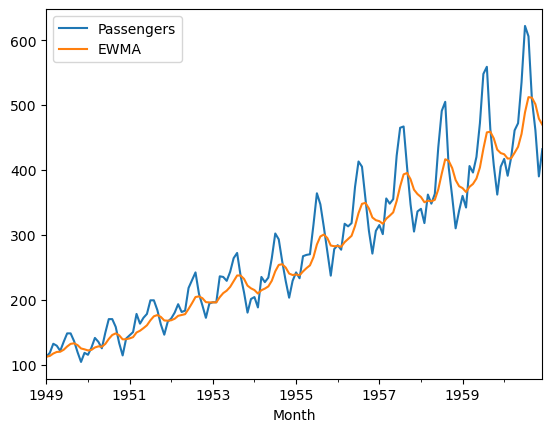

In [69]:
df.plot();

In [70]:
manual_ewma =[]
for x in df['Passengers'].to_numpy():
    if len(manual_ewma)>0:
        xhat=alpha*x +(1-alpha)*manual_ewma[-1]
    else:
        xhat=x
    manual_ewma.append(xhat)
df['Manual'] = manual_ewma

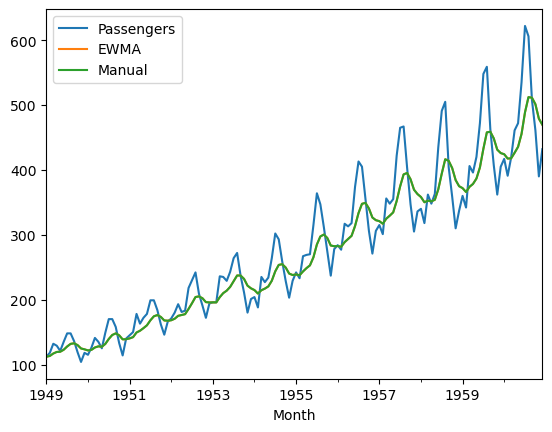

In [71]:
df.plot();

In [72]:
df.head()

,Passengers,EWMA,Manual
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


In [73]:
df.drop('Manual',axis=1,inplace=True)

In [74]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [75]:
ses = SimpleExpSmoothing(df['Passengers'])

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [78]:
df.index.freq = 'MS'

In [79]:
ses = SimpleExpSmoothing(df['Passengers'],
                        initialization_method='legacy-heuristic')

In [80]:
res = ses.fit(smoothing_level=alpha,optimized=False)

In [81]:
res

In [82]:
res.predict(start=df.index[0],end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [83]:
df['SES'] = res.predict(start=df.index[0],end=df.index[-1])

In [84]:
np.allclose(df['SES'],res.fittedvalues)

True

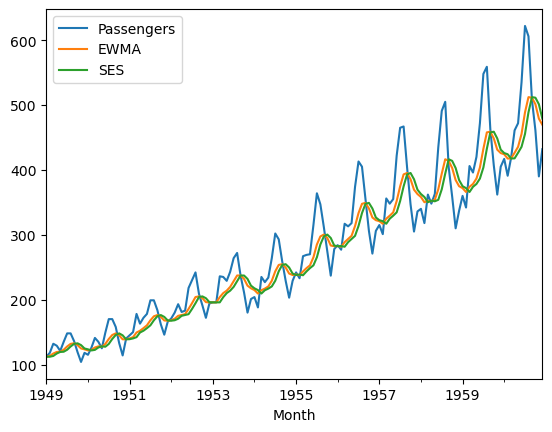

In [85]:
df.plot();

In [87]:
df.head()

,Passengers,EWMA,SES,SES-1
Month,,,,
1949-01-01,112,112.0000,112.000,112.0000
1949-02-01,118,113.2000,112.000,113.2000
1949-03-01,132,116.9600,113.200,116.9600
1949-04-01,129,119.3680,116.960,119.3680
1949-05-01,121,119.6944,119.368,119.6944


In [86]:
df['SES-1'] = df['SES'].shift(-1)

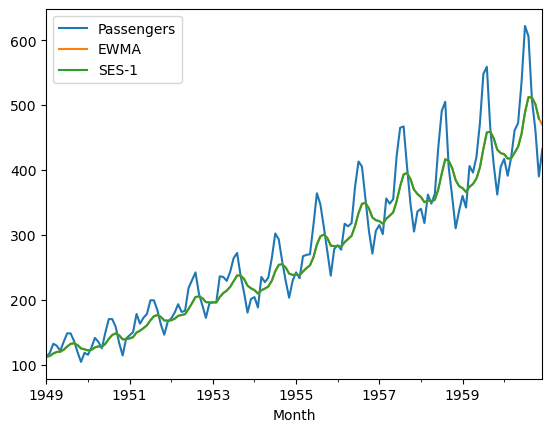

In [88]:
### This is wrong, do not do it
df[['Passengers','EWMA','SES-1']].plot();

In [89]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

N_test = 12: This sets the number of data points (rows) you want in the test set to be 12. This implies that the last 12 rows of df will be used for testing.

train = df.iloc[:-N_test]: This creates the training set.

df.iloc[...] is a method to select rows by integer-location based indexing.
:-N_test means "all rows except the last N_test rows". So, if N_test is 12, then :-12 would mean all rows except the last 12 rows.
Thus, this line sets train to be all rows of df except the last 12 rows.

test = df.iloc[-N_test:]: This creates the test set.

df.iloc[...] is again used to select rows.
-N_test: means "the last N_test rows". So, if N_test is 12, then -12: would mean the last 12 rows.
Thus, this line sets test to be the last 12 rows of df.

In summary, this code is creating a training set with all but the last 12 rows of df, and a test set with just the last 12 rows of df. This is a simple way to perform a train-test split, especially in time series data where you might want to train on earlier data and test on the most recent data.

In [91]:
ses = SimpleExpSmoothing(train['Passengers'],initialization_method='legacy-heuristic')
res = ses.fit()

In [92]:
# Boolean Series to index df rows
train_idx = df.index <= train.index[-1]
test_idx  = df.index > train.index[-1]

The provided code creates two Boolean Series (essentially arrays of True and False values) to index or filter rows from the df DataFrame based on certain conditions. Here's the breakdown:

train_idx = df.index <= train.index[-1]:

df.index: This gets the index of the DataFrame df. The index is essentially the row labels or identifiers.

train.index[-1]: This gets the last index value from the train DataFrame.

df.index <= train.index[-1]: This produces a Boolean Series where each element is True if the corresponding index in df is less than or equal to the last index in train, and False otherwise.

Essentially, train_idx will be True for all rows in df that are part of the training set (or before the test set begins).

test_idx = df.index > train.index[-1]:

df.index > train.index[-1]: This produces a Boolean Series where each element is True if the corresponding index in df is greater than the last index in train, and False otherwise.

Essentially, test_idx will be True for all rows in df that are part of the test set (or after the training set ends).

In practice, you can use these Boolean Series to filter or select rows from df:

To get the training set: df[train_idx]

To get the test set: df[test_idx]

This approach offers a more flexible and explicit way to split a DataFrame into training and test subsets, especially when dealing with time series data or when specific row-based conditions need to be applied.

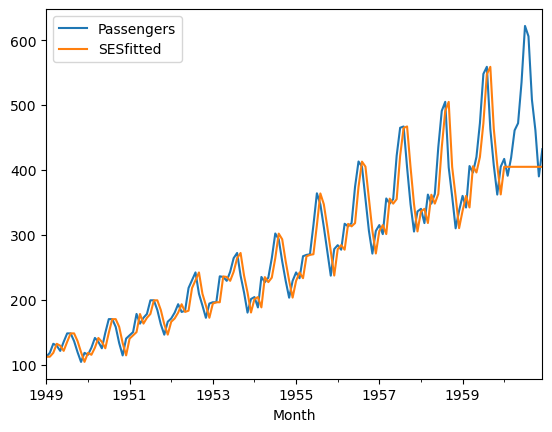

In [94]:
df.loc[train_idx,'SESfitted'] = res.fittedvalues
df.loc[test_idx,'SESfitted'] = res.forecast(N_test)
df[['Passengers','SESfitted']].plot();

In [95]:
# To check the value of alpha, Smoothing level is the value of alpha
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Holt's Linear Trend Model: Code

In [96]:
from statsmodels.tsa.holtwinters import Holt

In [97]:
holt = Holt(df['Passengers'],initialization_method='legacy-heuristic')

In [98]:
res_h = holt.fit()

In [99]:
df['Holt'] =res_h.fittedvalues

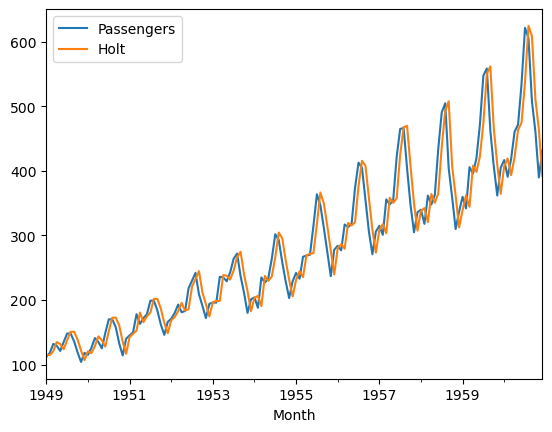

In [100]:
df[['Passengers','Holt']].plot();

In [101]:
holt = Holt(train['Passengers'],initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx,'Holt'] = res_h.fittedvalues

In [103]:
df.loc[test_idx,'Holt'] = res_h.forecast(N_test)

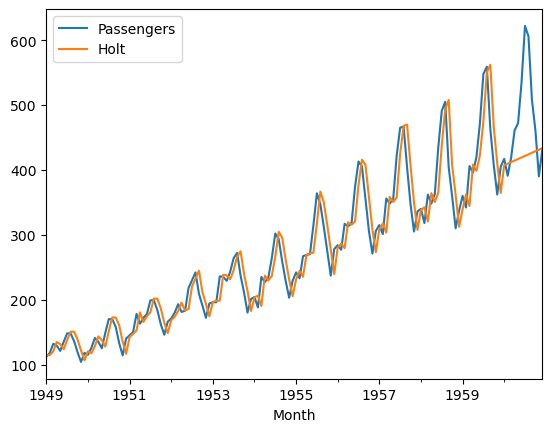

In [104]:
df[['Passengers','Holt']].plot();

## Holt Winter's Model: Code

In [105]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [106]:
hw = ExponentialSmoothing(
train['Passengers'],
initialization_method='legacy-heuristic',
trend='add',seasonal='add',seasonal_periods=12)

res_hw = hw.fit()

In [107]:
df.loc[train_idx,'HoltWinters'] = res_hw.fittedvalues

In [108]:
df.loc[test_idx,'HoltWinters'] = res_hw.forecast(N_test)

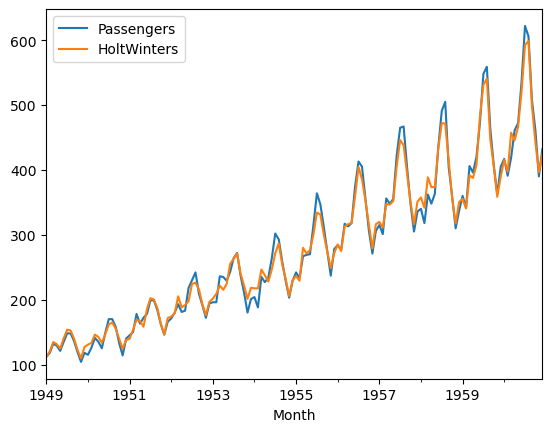

In [109]:
df[['Passengers','HoltWinters']].plot();

In [110]:
def rmse(y,t):
    return np.sqrt(np.mean((y-t)**2))

In [111]:
def mae(y,t):
    return np.mean(np.abs(y-t))

In [112]:
print("Train RMSE:",rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE:",rmse(test['Passengers'],res_hw.forecast(N_test)))

Train RMSE: 11.624680410246217
Test RMSE: 16.97955177255075


In [114]:
print("Train MAE:",mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE:",mae(test['Passengers'],res_hw.forecast(N_test)))

Train MAE: 9.007975798316831
Test MAE: 13.379954616111709


In [116]:
# lets change the parameters
hw = ExponentialSmoothing(
train['Passengers'],
initialization_method='legacy-heuristic',
trend='add',seasonal='mul',seasonal_periods=12)

res_hw = hw.fit()


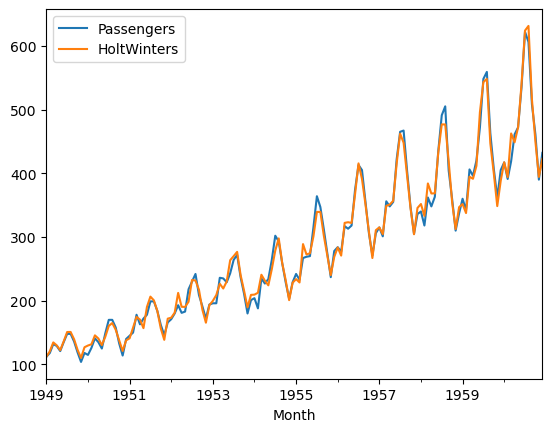

In [117]:
df.loc[train_idx,'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx,'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers','HoltWinters']].plot();

In [118]:
print("Train RMSE:",rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE:",rmse(test['Passengers'],res_hw.forecast(N_test)))

Train RMSE: 9.76803964806667
Test RMSE: 15.810258661805738


In [119]:
print("Train MAE:",mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE:",mae(test['Passengers'],res_hw.forecast(N_test)))

Train MAE: 7.60426595704287
Test MAE: 10.303025042603926


In [120]:
# Lets try all multiplicative
# lets change the parameters
hw = ExponentialSmoothing(
train['Passengers'],
initialization_method='legacy-heuristic',
trend='mul',seasonal='mul',seasonal_periods=12)

res_hw = hw.fit()


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


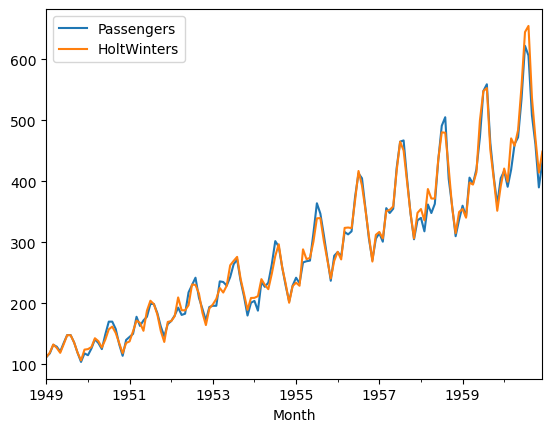

In [121]:
df.loc[train_idx,'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx,'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers','HoltWinters']].plot();

In [122]:
print("Train RMSE:",rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE:",rmse(test['Passengers'],res_hw.forecast(N_test)))

Train RMSE: 9.617924853699874
Test RMSE: 25.810810782828703


In [123]:
print("Train MAE:",mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE:",mae(test['Passengers'],res_hw.forecast(N_test)))

Train MAE: 7.112410112421437
Test MAE: 20.848776518820557
